# LOADING DATASET AND LIBRARIES

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
ca=pd.read_excel('Credit Banking_Project1.xls',sheet_name='Customer Acqusition')
sp=pd.read_excel('Credit Banking_Project1.xls',sheet_name='Spend')
rp=pd.read_excel('Credit Banking_Project1.xls',sheet_name='Repayment')

In [142]:
ca.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.929,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.535,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.664,BANGALORE,Platimum,10002,C5,Normal Salary


In [143]:
ca.describe()

,Sl No:,Age,Limit
count,100.000,100.000,100.000
mean,50.500,40.147,284700.610
std,29.011,23.630,218494.968
min,1.000,0.726,10000.000
25%,25.750,20.254,100000.000
50%,50.500,40.546,300001.500
75%,75.250,61.607,500000.000
max,100.000,78.432,500000.000


In [144]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


# MONTHLY SPEND

In [145]:
sp['Month']=pd.to_datetime(sp['Month'])
sp['Name of month']=sp['Month'].apply(lambda month : month.month)
sp['Year']=sp['Month'].apply(lambda month : month.year)

In [146]:
nm={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
sp['Name of month']=sp['Name of month'].map(nm)
sp.head()

,Sl No:,Costomer,Month,Type,Amount,Name of month,Year
0,1,A1,2004-01-12,JEWELLERY,473775.835,Jan,2004
1,2,A1,2004-01-03,PETRO,335578.666,Jan,2004
2,3,A1,2004-01-15,CLOTHES,371040.942,Jan,2004
3,4,A1,2004-01-25,FOOD,141177.813,Jan,2004
4,5,A1,2005-01-17,CAMERA,398403.772,Jan,2005


In [147]:
df1=sp[['Costomer','Amount','Name of month','Year']]
df1

,Costomer,Amount,Name of month,Year
0,A1,473775.835,Jan,2004
1,A1,335578.666,Jan,2004
2,A1,371040.942,Jan,2004
3,A1,141177.813,Jan,2004
4,A1,398403.772,Jan,2005
...,...,...,...,...
1495,A67,195841.312,Feb,2006
1496,A68,284262.518,Mar,2006
1497,A69,206552.274,Mar,2006
1498,A70,41024.781,Mar,2006


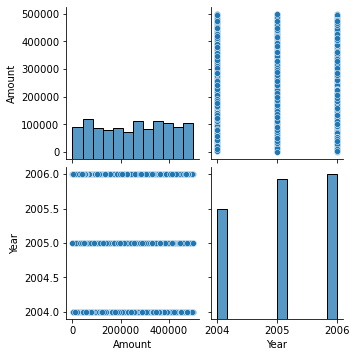

In [195]:
sns.pairplot(data=df1,palette='Blues_d')

In [148]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [149]:
Q1=df1.groupby(['Costomer','Year','Name of month']).sum().reset_index()
Q1['Costomer'].str.strip()
Q1

,Costomer,Year,Name of month,Amount
0,A1,2004,Feb,41381.106
1,A1,2004,Jan,1511172.746
2,A1,2004,May,131196.588
3,A1,2005,Aug,129388.313
4,A1,2005,Feb,1404193.042
...,...,...,...,...
802,A95,2004,Jan,347833.880
803,A96,2004,Jan,320363.536
804,A97,2004,Jan,164330.042
805,A98,2004,Jan,87483.512


In [150]:
g1 = Q1.loc[Q1['Costomer'].isin(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'])]
g1.head()

,Costomer,Year,Name of month,Amount
0,A1,2004,Feb,41381.106
1,A1,2004,Jan,1511172.746
2,A1,2004,May,131196.588
3,A1,2005,Aug,129388.313
4,A1,2005,Feb,1404193.042


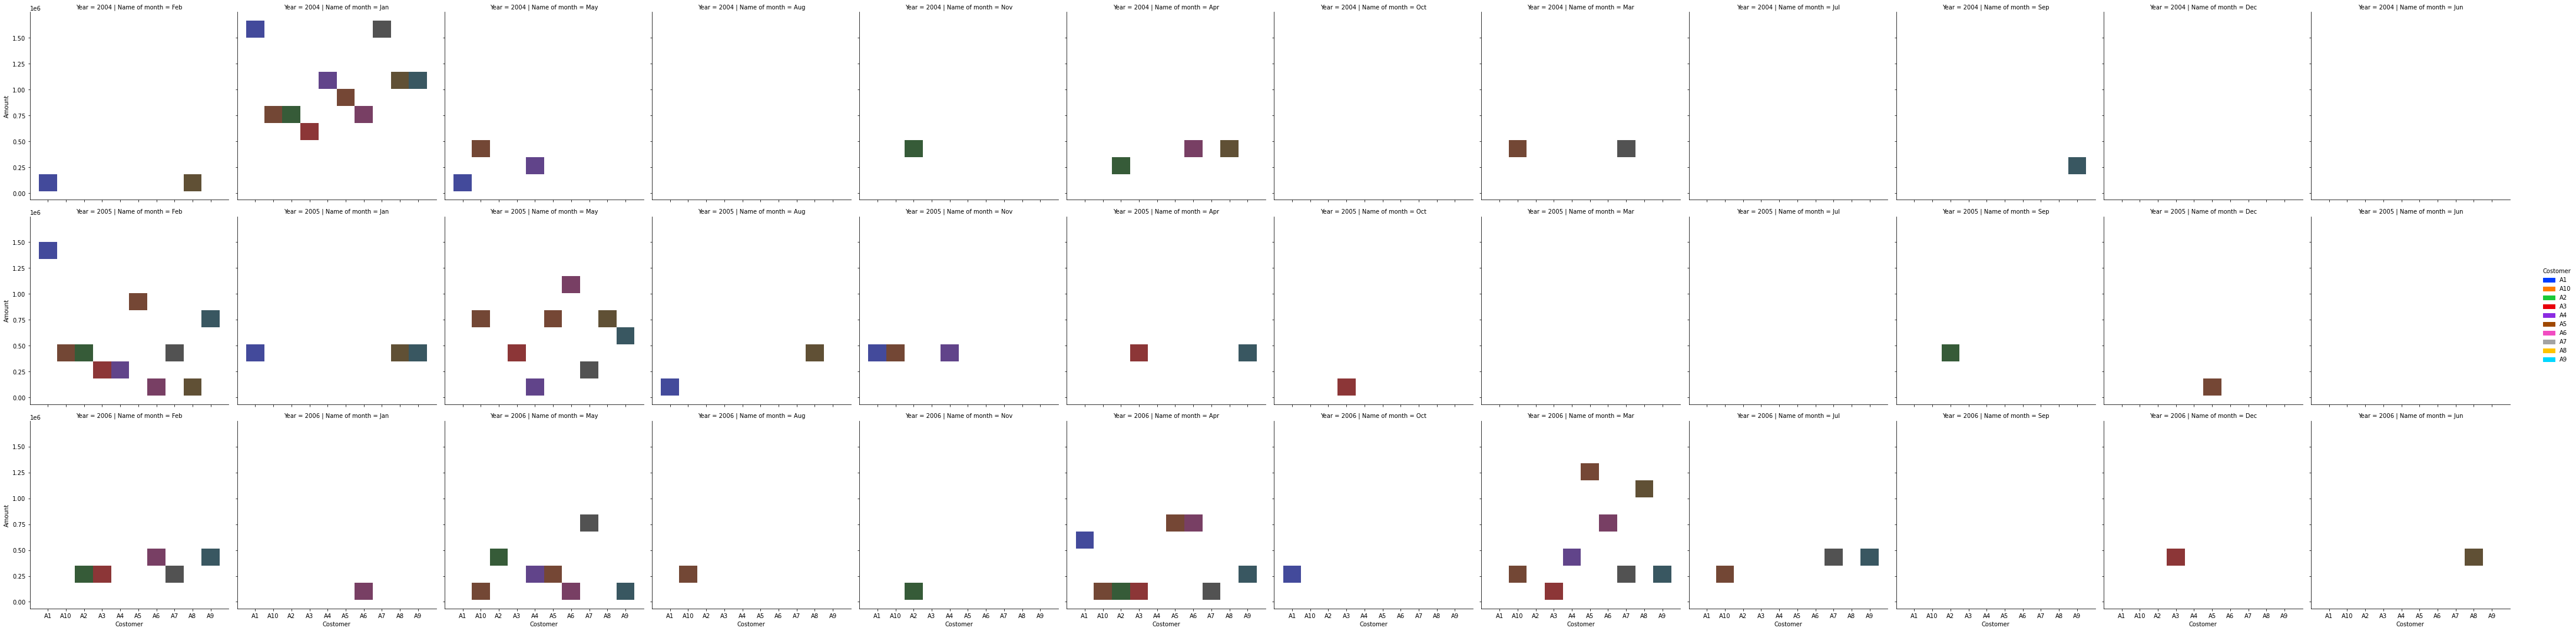

In [151]:
sns.displot(data=g1,
    x='Costomer',
    y='Amount',
    hue='Costomer',
    row='Year',
    col='Name of month',kind='hist',palette="bright")

# MONTHLY REPAYMENT

In [152]:
rp.head()

,SL No:,Costomer,Month,Amount
0,1,A1,2004-01-12,331844.007
1,2,A1,2004-01-03,441139.807
2,3,A1,2004-01-15,32480.004
3,4,A1,2004-01-25,90636.967
4,5,A1,2005-01-17,1581.970


In [153]:
rp['Month']=pd.to_datetime(rp['Month'])
rp['Name of month']=rp['Month'].apply(lambda month : month.month)
rp['Year']=rp['Month'].apply(lambda month : month.year)

In [154]:
nm={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
rp['Name of month']=rp['Name of month'].map(nm)
rp.head()

,SL No:,Costomer,Month,Amount,Name of month,Year
0,1,A1,2004-01-12,331844.007,Jan,2004
1,2,A1,2004-01-03,441139.807,Jan,2004
2,3,A1,2004-01-15,32480.004,Jan,2004
3,4,A1,2004-01-25,90636.967,Jan,2004
4,5,A1,2005-01-17,1581.970,Jan,2005


In [155]:
df2=rp[['Costomer','Amount','Name of month','Year']]
df2

,Costomer,Amount,Name of month,Year
0,A1,331844.007,Jan,2004
1,A1,441139.807,Jan,2004
2,A1,32480.004,Jan,2004
3,A1,90636.967,Jan,2004
4,A1,1581.970,Jan,2005
...,...,...,...,...
1495,A67,200288.874,May,2005
1496,A68,231194.702,May,2006
1497,A69,391195.616,Jul,2006
1498,A70,357629.618,Aug,2005


In [156]:
Q2=df2.groupby(['Costomer','Year','Name of month']).sum().reset_index()
Q2['Costomer'].str.strip()
Q2.sort_values(['Costomer','Year','Name of month'])

,Costomer,Year,Name of month,Amount
0,A1,2004,Feb,191180.012
1,A1,2004,Jan,1362775.235
2,A1,2005,Feb,1199807.625
3,A1,2005,Jan,1581.970
4,A1,2005,Jul,300581.703
...,...,...,...,...
793,A95,2004,Jan,75109.492
794,A96,2004,Jan,110139.014
795,A97,2004,Jan,174606.392
796,A98,2004,Jan,97802.599


In [157]:
g2 = Q2.loc[Q2['Costomer'].isin(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'])]
g2.head()

,Costomer,Year,Name of month,Amount
0,A1,2004,Feb,191180.012
1,A1,2004,Jan,1362775.235
2,A1,2005,Feb,1199807.625
3,A1,2005,Jan,1581.970
4,A1,2005,Jul,300581.703


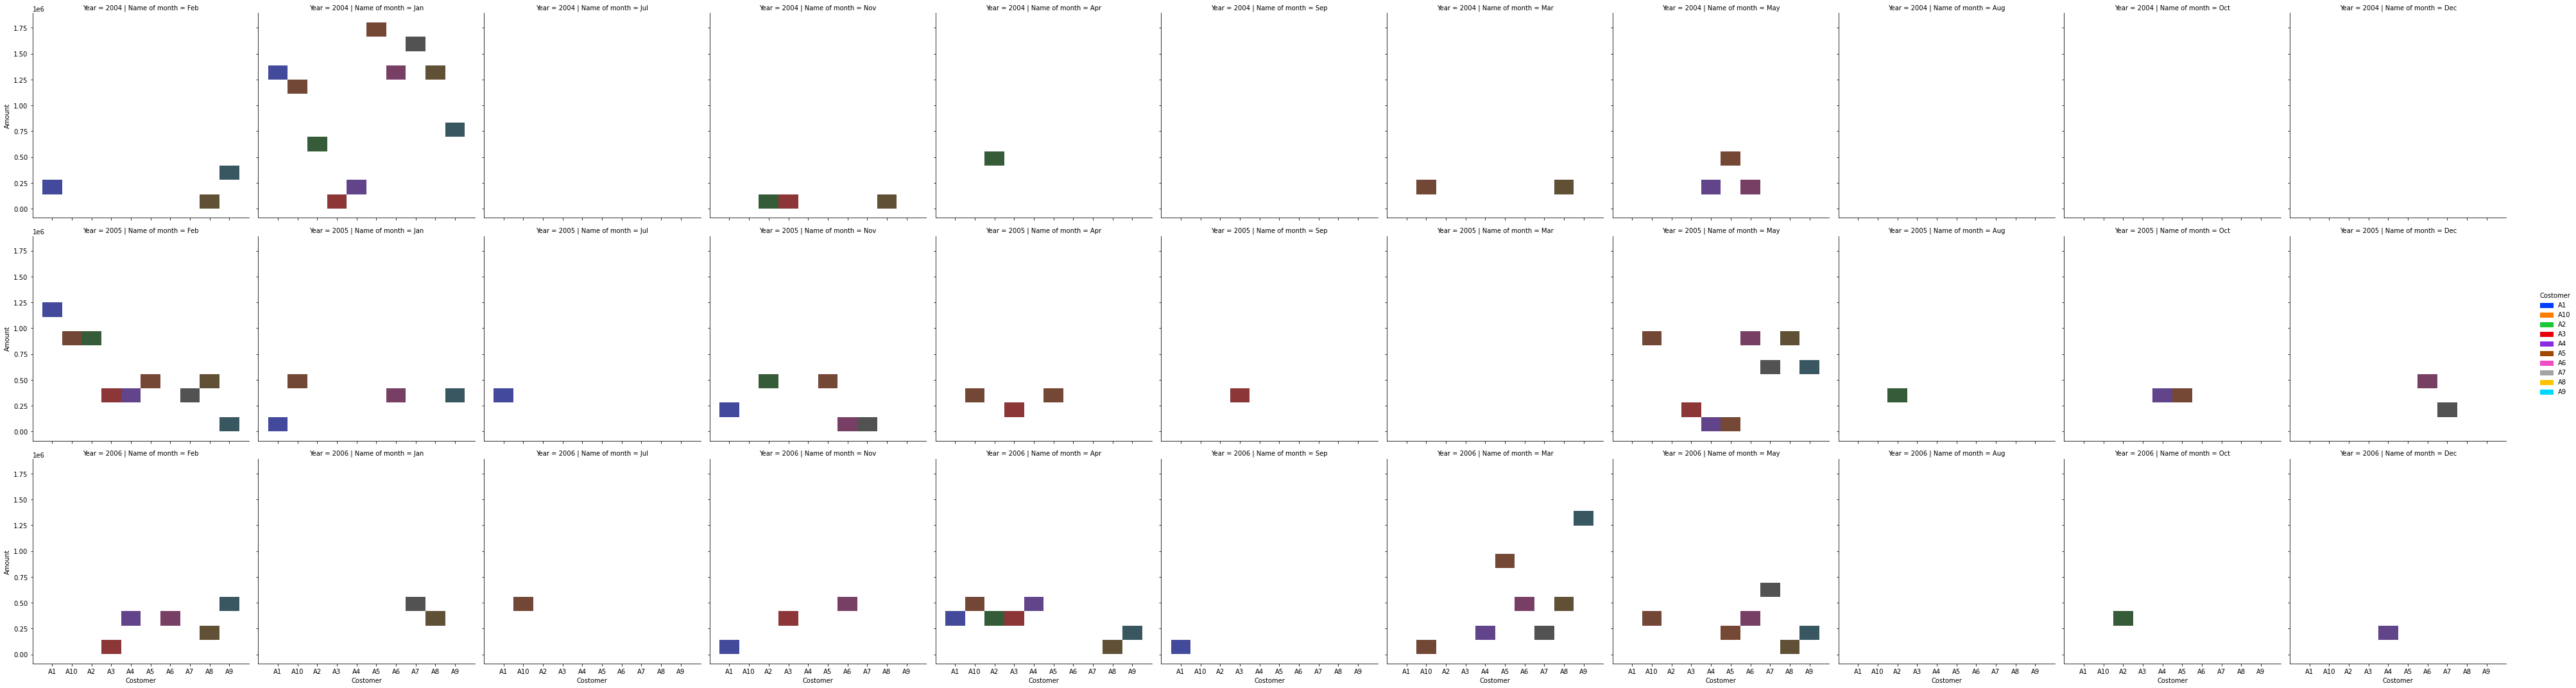

In [158]:
sns.displot(data=g2,
    x='Costomer',
    y='Amount',
    hue='Costomer',
    row='Year',
    col='Name of month',kind='hist',palette="bright")

# HIGHEST PAYING CUSTOMERS

In [159]:
df3=Q2[['Costomer','Amount']].groupby('Costomer').sum()

In [160]:
df4=df3['Amount'].sort_values(ascending=False)

In [161]:
Q3=df4.head(10)
Q3=Q3.reset_index()
Q3

,Costomer,Amount
0,A22,9767170.683
1,A60,9262032.375
2,A61,8807888.339
3,A40,8805084.898
4,A47,8529825.865
5,A43,8458621.332
6,A48,8432803.656
7,A41,8374045.758
8,A49,8259840.547
9,A45,8115209.875


<AxesSubplot:xlabel='Costomer', ylabel='Amount'>

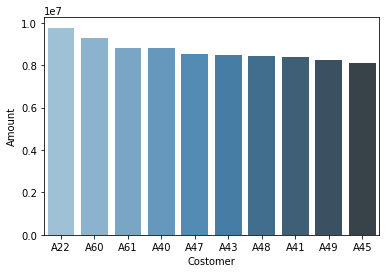

In [162]:
sns.barplot( data=Q3,
    x='Costomer',
    y='Amount',palette="Blues_d")

# HIGHEST SPENDING SEGMENT

In [163]:
df5=ca[['Customer','Segment']]
df5

,Customer,Segment
0,A1,Self Employed
1,A2,Salaried_MNC
2,A3,Salaried_Pvt
3,A4,Govt
4,A5,Normal Salary
...,...,...
95,A96,Salaried_Pvt
96,A97,Govt
97,A98,Normal Salary
98,A99,Self Employed


<AxesSubplot:xlabel='Customer', ylabel='Segment'>

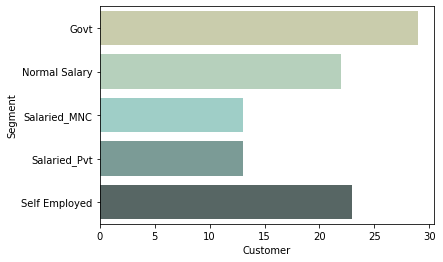

In [164]:
t1=df5.groupby('Segment').count()
t1=t1.reset_index()
sns.barplot(x='Customer',
    y='Segment',
    data=t1, palette='BrBG_d')

In [165]:
dictionary = {}

for i in range(0, 100):
    key = df5['Customer'].iloc[i]
    value = df5['Segment'].iloc[i]
    dictionary[key]=value

In [189]:
df2['Segment']=df2['Costomer'].map(dictionary)

In [167]:
Q4=df2[['Amount','Segment']].groupby('Segment').sum()
Q4=Q4.reset_index()
Q4=Q4.sort_values(by='Amount', ascending=False)
Q4

,Segment,Amount
1,Normal Salary,107108892.771
4,Self Employed,70551286.954
3,Salaried_Pvt,65779451.403
0,Govt,65171408.921
2,Salaried_MNC,62597404.077


<AxesSubplot:xlabel='Segment', ylabel='Amount'>

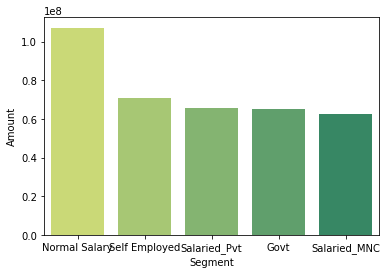

In [168]:
sns.barplot(x='Segment',
    y='Amount',
    data= Q4,palette="summer_r")

#    HIGHEST SPENDING AGE GROUP 

In [169]:
df6=ca[['Customer','Age']]
df6

,Customer,Age
0,A1,0.929
1,A2,35.535
2,A3,11.559
3,A4,45.820
4,A5,69.664
...,...,...
95,A96,29.632
96,A97,20.612
97,A98,40.539
98,A99,21.589


In [170]:
dictionary = {}
for i in range (0,100):
    key = df6['Customer'].iloc[i]
    value = df6['Age'].iloc[i]
    dictionary[key]=value

In [171]:
df2['Age']=df2['Costomer'].map(dictionary)


In [172]:
df2['r_age']=df2['Age'].apply(np.ceil)


In [173]:
r1=df2.groupby('r_age').sum()
r1=r1.reset_index()

<AxesSubplot:xlabel='r_age'>

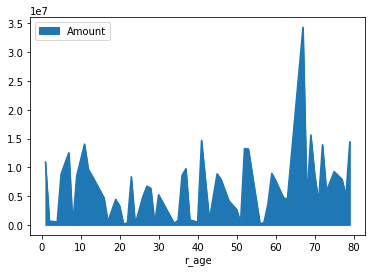

In [174]:
r1.plot(x='r_age',y='Amount',kind='area')

In [175]:
age_groups = [ (18,30), (31,40), (41,50), (51,60), (61,70),(71,80)]

In [176]:
df2['Agegroup'] = np.digitize(df2['Age'], bins=[x[0] for x in age_groups] + [age_groups[-1][1]+1])

In [177]:
df2['Agegroup'] = df2['Agegroup'].map({i: f'{age_groups[i-1][0]}-{age_groups[i-1][1]}' for i in range(1, len(age_groups)+1)})

In [178]:
df7=df2[['Agegroup','Amount']]
Q5=df7.groupby('Agegroup').sum().reset_index()
Q5

,Agegroup,Amount
0,18-30,40398309.769
1,31-40,35471879.203
2,41-50,25054902.900
3,51-60,47252805.981
4,61-70,76528068.210
5,71-80,56454381.482


<AxesSubplot:xlabel='Agegroup'>

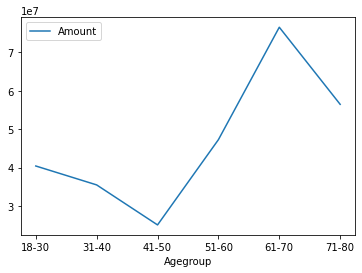

In [179]:
Q5.plot(x='Agegroup',y='Amount',kind='line')

# HIGHEST SPENDING CATEGORY

In [180]:
df8=sp[['Type','Amount']]
Q6=df8.groupby('Type').sum().reset_index()
Q6.sort_values('Amount',ascending= False).head()

,Type,Amount
10,PETRO,51022582.685
4,CAMERA,43721012.594
7,FOOD,38296462.747
0,AIR TICKET,37435465.640
14,TRAIN TICKET,31812624.166


<AxesSubplot:xlabel='Amount', ylabel='Type'>

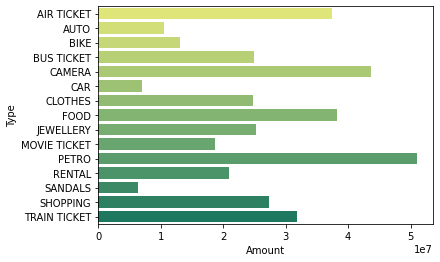

In [181]:
sns.barplot(x='Amount',
    y='Type',
    data=Q6,palette="summer_r" )

# BANK PROFIT

In [182]:
sp['Month']=pd.to_datetime(sp['Month'])
sp['no of month']=sp['Month'].apply(lambda month : month.month)
df10=sp[['Costomer','Year','no of month','Amount']]
df10.head()

,Costomer,Year,no of month,Amount
0,A1,2004,1,473775.835
1,A1,2004,1,335578.666
2,A1,2004,1,371040.942
3,A1,2004,1,141177.813
4,A1,2005,1,398403.772


In [183]:
rp['Month']=pd.to_datetime(rp['Month'])
rp['no of month']=rp['Month'].apply(lambda month : month.month)
df9=rp[['Costomer','Year','no of month','Amount']]
df9.head()

,Costomer,Year,no of month,Amount
0,A1,2004,1,331844.007
1,A1,2004,1,441139.807
2,A1,2004,1,32480.004
3,A1,2004,1,90636.967
4,A1,2005,1,1581.970


In [184]:
spm=df10.groupby(['Costomer','Year','no of month']).sum().reset_index()

In [185]:
rpm=df9.groupby(['Costomer','Year','no of month']).sum().reset_index()

In [186]:
balance_amount=spm['Amount']-rpm['Amount']

In [187]:
Bank_profit=0.029*balance_amount.sum()

In [188]:
Bank_profit

219483.73867848454

# VALUABLE INSIGHTS

•Most of our customer base comprises individuals from the government and self-employed sectors.

•In terms of expenditure, both salaried and self-employed individuals rank highly. 

•Notably, individuals above the age of 50, particularly within the 60-70 age group, make up a significant portion of our credit card users. 

•The transactions conducted by our customers primarily involve everyday essentials such as food, fuel, and travel tickets. 

•Specifically, customers with the identification numbers 22, 60, 61, 40, and 47 are the most frequent users of our card services.